# Explore NHANES

This is a first swing at exploring NHANES datasets. Currently just working with the 2021-2023 survey and only using day 1 of the dietary recalls. 

## Set Working Directory

When you open a notebook, the default working directory will be the folder that notebook is in. We want it to be the top (root) directory of the project, 'ds1_nhanes'.

First, we need to mount our Google Drive, which contains the `ds1_nhanes` folder:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now check out current working directory:

In [ ]:
import os
os.getcwd()

The working directory of the notebook defaults to the directory the notebook is in, so this is probably ds1_nhanes/notebooks. 

We want to change it to ds1_nhanes:

In [ ]:
os.chdir('/content/drive/MyDrive/ds1_nhanes/')

Bingo bongo, we're good to go.

The below chunk should only be run locally, not with Colab

In [ ]:
# Don't run

# import os
# from pathlib import Path
# os.chdir(Path(os.getcwd()).parent)
# print(os.getcwd())

## Load Data and Libraries

In [4]:
import pandas as pd
import numpy as np

For now we are exploring the 2021-2023 wave dietary recall data for day 1.

In [5]:
df = pd.read_sas('data/raw/nhanes_2021_2023/DR1IFF_L.xpt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 84 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      100116 non-null  float64
 1   WTDRD1    100116 non-null  float64
 2   WTDR2D    100116 non-null  float64
 3   DR1ILINE  100116 non-null  float64
 4   DR1DRSTZ  100116 non-null  float64
 5   DR1EXMER  100116 non-null  float64
 6   DRABF     99847 non-null   float64
 7   DRDINT    100116 non-null  float64
 8   DR1DBIH   94128 non-null   float64
 9   DR1DAY    100116 non-null  float64
 10  DR1LANG   100025 non-null  float64
 11  DR1CCMNM  100116 non-null  float64
 12  DR1CCMTX  100116 non-null  float64
 13  DR1_020   100116 non-null  float64
 14  DR1_030Z  100116 non-null  float64
 15  DR1FS     92784 non-null   float64
 16  DR1_040Z  99787 non-null   float64
 17  DR1IFDCD  100116 non-null  float64
 18  DR1IGRMS  99787 non-null   float64
 19  DR1IKCAL  99787 non-null   float64
 20  DR1I

## Create key for DR1IFF

Creating a df to be saved as .csv that includes definitions of every variable in the DR1 data. I'm pretty sure there is a better way to do this, because when you pull the data in R you can see these definitions are attributes. But I don't know how to find those attributes in python. 

In [6]:
# Get a printout of each column name as a template
# We will copy and paste this into next cell so we can write definitions
column_definitions = {col: "" for col in df.columns}
for col in column_definitions:
    print(f'"{col}": "",  # ')

"SEQN": "",  # 
"WTDRD1": "",  # 
"WTDR2D": "",  # 
"DR1ILINE": "",  # 
"DR1DRSTZ": "",  # 
"DR1EXMER": "",  # 
"DRABF": "",  # 
"DRDINT": "",  # 
"DR1DBIH": "",  # 
"DR1DAY": "",  # 
"DR1LANG": "",  # 
"DR1CCMNM": "",  # 
"DR1CCMTX": "",  # 
"DR1_020": "",  # 
"DR1_030Z": "",  # 
"DR1FS": "",  # 
"DR1_040Z": "",  # 
"DR1IFDCD": "",  # 
"DR1IGRMS": "",  # 
"DR1IKCAL": "",  # 
"DR1IPROT": "",  # 
"DR1ICARB": "",  # 
"DR1ISUGR": "",  # 
"DR1IFIBE": "",  # 
"DR1ITFAT": "",  # 
"DR1ISFAT": "",  # 
"DR1IMFAT": "",  # 
"DR1IPFAT": "",  # 
"DR1ICHOL": "",  # 
"DR1IATOC": "",  # 
"DR1IATOA": "",  # 
"DR1IRET": "",  # 
"DR1IVARA": "",  # 
"DR1IACAR": "",  # 
"DR1IBCAR": "",  # 
"DR1ICRYP": "",  # 
"DR1ILYCO": "",  # 
"DR1ILZ": "",  # 
"DR1IVB1": "",  # 
"DR1IVB2": "",  # 
"DR1INIAC": "",  # 
"DR1IVB6": "",  # 
"DR1IFOLA": "",  # 
"DR1IFA": "",  # 
"DR1IFF": "",  # 
"DR1IFDFE": "",  # 
"DR1ICHL": "",  # 
"DR1IVB12": "",  # 
"DR1IB12A": "",  # 
"DR1IVC": "",  # 
"DR1IVD": "",  # 
"DR1IVK": "",  #

In [7]:
# Make a df with column names and definitions
definitions = [
    'respondent_sequence_number', # respondent id
    'weight_day_1_dietary',
    'weight_day_2_dietary',
    'food_component_number',
    'dietary_recall_status',
    'interviewer_id_code',
    'breast_fed_infant',
    'number_of_days_of_intake',
    'days_between_intake_and_interview',
    'intake_day_of_week',

    'language',
    'combination_food_number',
    'combination_food_type',
    'time_of_meal',
    'name_of_meal',
    'food_source',
    'ate_at_home',
    'usda_food_code', # Use these to link to FPED
    'grams',
    'energy_kcal',

    'protein_gm',
    'carbohydrate_gm',
    'sugar_gm',
    'fiber_gm',
    'fat_gm',
    'saturated_fat_gm',
    'monounsaturated_fat_gm',
    'polyunsaturated_fat_gm',
    'cholesterol_mg',
    'vitamin_e_mcg',

    'added_vitamin_e_mcg',
    'retinol_mcg',
    'vitamin_a_mcg',
    'alpha_carotene_mcg',
    'beta_carotene_mcg',
    'beta_cryptoxanthin_mcg',
    'lycopene_mcg',
    'lutein_zeaxanthin_mcg',
    'vitamin_b1_mcg',
    'vitamin_b2_mcg',

    'niacin_mg',
    'vitamin_b6_mcg',
    'folate_mcg',
    'folic_acid_mcg',
    'food_folate_mcg',
    'folate_dfe_mcg',
    'choline_mg',
    'vitamin_b12_mcg',
    'added_vitamin_b12_mcg',
    'vitamin_c_mg',

    'vitamin_d_mcg',
    'vitamin_k_mcg',
    'calcium_mg',
    'phosphorus_mg',
    'magnesium_mg',
    'iron_mg',
    'zinc_mg',
    'copper_mg',
    'sodium_mg',
    'potassium_mg',

    'selenium_mcg',
    'caffeine_mg',
    'theobromine_mg',
    'alcohol_gm',
    'moisture_gm',
    'sfa_40_gm',
    'sfa_60_gm',
    'sfa_80_gm',
    'sfa_100_gm',
    'sfa_120_gm',

    'sfa_140_gm',
    'sfa_160_gm',
    'sfa_180_gm',
    'mfa_161_gm',
    'mfa_181_gm',
    'mfa_201_gm',
    'mfa_221_gm',
    'pfa_182_gm',
    'pfa_183_gm',
    'pfa_184_gm',

    'pfa_204_gm',
    'pfa_205_gm',
    'pfa_225_gm',
    'pfa_226_gm'
]
print(definitions)

['respondent_sequence_number', 'weight_day_1_dietary', 'weight_day_2_dietary', 'food_component_number', 'dietary_recall_status', 'interviewer_id_code', 'breast_fed_infant', 'number_of_days_of_intake', 'days_between_intake_and_interview', 'intake_day_of_week', 'language', 'combination_food_number', 'combination_food_type', 'time_of_meal', 'name_of_meal', 'food_source', 'ate_at_home', 'usda_food_code', 'grams', 'energy_kcal', 'protein_gm', 'carbohydrate_gm', 'sugar_gm', 'fiber_gm', 'fat_gm', 'saturated_fat_gm', 'monounsaturated_fat_gm', 'polyunsaturated_fat_gm', 'cholesterol_mg', 'vitamin_e_mcg', 'added_vitamin_e_mcg', 'retinol_mcg', 'vitamin_a_mcg', 'alpha_carotene_mcg', 'beta_carotene_mcg', 'beta_cryptoxanthin_mcg', 'lycopene_mcg', 'lutein_zeaxanthin_mcg', 'vitamin_b1_mcg', 'vitamin_b2_mcg', 'niacin_mg', 'vitamin_b6_mcg', 'folate_mcg', 'folic_acid_mcg', 'food_folate_mcg', 'folate_dfe_mcg', 'choline_mg', 'vitamin_b12_mcg', 'added_vitamin_b12_mcg', 'vitamin_c_mg', 'vitamin_d_mcg', 'vitam

In [8]:
definitions = pd.DataFrame({'variable_name': df.columns, 'definition': definitions})
definitions.head()

,variable_name,definition
0,SEQN,respondent_sequence_number
1,WTDRD1,weight_day_1_dietary
2,WTDR2D,weight_day_2_dietary
3,DR1ILINE,food_component_number
4,DR1DRSTZ,dietary_recall_status


In [9]:
# Save definitions to objects folder
definitions.to_csv('data/miscellany/dr1_definitions_2021.csv')

## Explore Dietary Recall Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 84 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      100116 non-null  float64
 1   WTDRD1    100116 non-null  float64
 2   WTDR2D    100116 non-null  float64
 3   DR1ILINE  100116 non-null  float64
 4   DR1DRSTZ  100116 non-null  float64
 5   DR1EXMER  100116 non-null  float64
 6   DRABF     99847 non-null   float64
 7   DRDINT    100116 non-null  float64
 8   DR1DBIH   94128 non-null   float64
 9   DR1DAY    100116 non-null  float64
 10  DR1LANG   100025 non-null  float64
 11  DR1CCMNM  100116 non-null  float64
 12  DR1CCMTX  100116 non-null  float64
 13  DR1_020   100116 non-null  float64
 14  DR1_030Z  100116 non-null  float64
 15  DR1FS     92784 non-null   float64
 16  DR1_040Z  99787 non-null   float64
 17  DR1IFDCD  100116 non-null  float64
 18  DR1IGRMS  99787 non-null   float64
 19  DR1IKCAL  99787 non-null   float64
 20  DR1I

Compare the dimensions of the df with the number of unique SEQN numbers (respondent ids)

In [11]:
# Compare rows to unique respondent IDs
# first get number of rows
columns = df.shape[0]
unique_seqns = df['SEQN'].nunique()
print(f"There are {columns} columns and {unique_seqns} unique SEQN numbers.")

There are 100116 columns and 6751 unique SEQN numbers.


There are far more rows than unique respondents. This is because for each respondent, there is one row for each individual food they consumed.

Check out how many unique food codes there are:

In [12]:
n_codes = df['DR1IFDCD'].nunique()
print(f"There are {n_codes} unique food codes")

There are 3987 unique food codes


## Join with FPED

To identify the foods from food codes, we join with the Food Patterns Equivalents Database (FPED). This links it to the ~39 USDA food categories that correspond to national dietary recommendations. It also converts from sensible units like grams to American units like cups.

In [13]:
fped = pd.read_csv('data/miscellany/FPED_1720.csv')
fped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FOODCODE                   7444 non-null   int64  
 1   DESCRIPTION                7444 non-null   object 
 2   F_TOTAL (cup eq)           7444 non-null   float64
 3   F_CITMLB (cup eq)          7444 non-null   float64
 4   F_OTHER (cup eq)           7444 non-null   float64
 5   F_JUICE (cup eq)           7444 non-null   float64
 6   V_TOTAL (cup eq)           7444 non-null   float64
 7   V_DRKGR (cup eq)           7444 non-null   float64
 8   V_REDOR_TOTAL (cup eq)     7444 non-null   float64
 9   V_REDOR_TOMATO (cup eq)    7444 non-null   float64
 10  V_REDOR_OTHER (cup eq)     7444 non-null   float64
 11  V_STARCHY_TOTAL (cup eq)   7444 non-null   float64
 12  V_STARCHY_POTATO (cup eq)  7444 non-null   float64
 13  V_STARCHY_OTHER (cup eq)   7444 non-null   float

Get the column names which identify food codes as containing any amount of legumes, nuts/seeds, or soy:

In [14]:
# Keywords we will use to find column names
keywords = ['LEGUMES', 'NUTSDS', 'SOY']
pbp_columns = [col for col in fped.columns if any(keyword in col for keyword in keywords)]
print(pbp_columns)

['V_LEGUMES (cup eq)', 'PF_SOY (oz eq)', 'PF_NUTSDS (oz eq)', 'PF_LEGUMES (oz eq)']


Note that we have two PF (protein and fat) variables, and one V (vegetable?) variable. If we are only interested in proteins specifically, we should just take the PF variables.

Now identify the food codes that are PBPs:

In [15]:
# Condition is that any one of those columns says the food code has more some amount of it
condition = (fped[pbp_columns] > 0).any(axis=1)

# Filter by the condition
pbp_codes = fped.loc[condition, 'FOODCODE']

# Print number of unique codes
n_codes = len(pbp_codes)
print(f'There are {n_codes} unique PBP food codes')

There are 800 unique PBP food codes


Make a column that identifies whether foods are PBPs or not:

In [18]:
df_pbp = df
df_pbp['is_pbp'] = df_pbp['DR1IFDCD'].isin(pbp_codes).astype(int)
df_pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 85 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      100116 non-null  float64
 1   WTDRD1    100116 non-null  float64
 2   WTDR2D    100116 non-null  float64
 3   DR1ILINE  100116 non-null  float64
 4   DR1DRSTZ  100116 non-null  float64
 5   DR1EXMER  100116 non-null  float64
 6   DRABF     99847 non-null   float64
 7   DRDINT    100116 non-null  float64
 8   DR1DBIH   94128 non-null   float64
 9   DR1DAY    100116 non-null  float64
 10  DR1LANG   100025 non-null  float64
 11  DR1CCMNM  100116 non-null  float64
 12  DR1CCMTX  100116 non-null  float64
 13  DR1_020   100116 non-null  float64
 14  DR1_030Z  100116 non-null  float64
 15  DR1FS     92784 non-null   float64
 16  DR1_040Z  99787 non-null   float64
 17  DR1IFDCD  100116 non-null  float64
 18  DR1IGRMS  99787 non-null   float64
 19  DR1IKCAL  99787 non-null   float64
 20  DR1I

In [19]:
# Make another new column that just multiplies grams by is_bpl
# so it is 0 if not bpl, or the number of grams if it is
df_pbp['grams_pbp'] = np.where(df_pbp['is_pbp'] == True, df_pbp['DR1IGRMS'], 0)

In [20]:
# Let's just take SEQN, one day weights, food codes, grams, is_bpl, and grams bpl for now
# Then we will join this with demographics to look at BPL consumption
df_pbp = df_pbp[['SEQN', 'WTDRD1', 'DR1IFDCD', 'DR1IGRMS', 'is_pbp', 'grams_pbp']]
df_pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SEQN       100116 non-null  float64
 1   WTDRD1     100116 non-null  float64
 2   DR1IFDCD   100116 non-null  float64
 3   DR1IGRMS   99787 non-null   float64
 4   is_pbp     100116 non-null  int64  
 5   grams_pbp  100116 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.6 MB


## Add Demographics

Load demographic data as xpt:

In [21]:
demos = pd.read_sas('data/raw/nhanes_2021_2023/DEMO_L.xpt')
demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   SDDSRVYR  11933 non-null  float64
 2   RIDSTATR  11933 non-null  float64
 3   RIAGENDR  11933 non-null  float64
 4   RIDAGEYR  11933 non-null  float64
 5   RIDAGEMN  377 non-null    float64
 6   RIDRETH1  11933 non-null  float64
 7   RIDRETH3  11933 non-null  float64
 8   RIDEXMON  8860 non-null   float64
 9   RIDEXAGM  2787 non-null   float64
 10  DMQMILIZ  8301 non-null   float64
 11  DMDBORN4  11914 non-null  float64
 12  DMDYRUSR  1875 non-null   float64
 13  DMDEDUC2  7794 non-null   float64
 14  DMDMARTZ  7792 non-null   float64
 15  RIDEXPRG  1503 non-null   float64
 16  DMDHHSIZ  11933 non-null  float64
 17  DMDHRGND  4115 non-null   float64
 18  DMDHRAGZ  4124 non-null   float64
 19  DMDHREDZ  3746 non-null   float64
 20  DMDHRMAZ  4020 non-null   fl

Take the columns SEQN, age, gender, race, education, and ratio of family income to poverty:

In [22]:
demos = demos[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMDEDUC2', 'INDFMPIR']]
demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   RIAGENDR  11933 non-null  float64
 2   RIDAGEYR  11933 non-null  float64
 3   RIDRETH3  11933 non-null  float64
 4   DMDEDUC2  7794 non-null   float64
 5   INDFMPIR  9892 non-null   float64
dtypes: float64(6)
memory usage: 559.5 KB


Merge demographics with our pbp data frame:

In [23]:
# Now join our demos with our DR1 data
joined = df_pbp.merge(demos, on='SEQN', how='left')
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SEQN       100116 non-null  float64
 1   WTDRD1     100116 non-null  float64
 2   DR1IFDCD   100116 non-null  float64
 3   DR1IGRMS   99787 non-null   float64
 4   is_pbp     100116 non-null  int64  
 5   grams_pbp  100116 non-null  float64
 6   RIAGENDR   100116 non-null  float64
 7   RIDAGEYR   100116 non-null  float64
 8   RIDRETH3   100116 non-null  float64
 9   DMDEDUC2   73938 non-null   float64
 10  INDFMPIR   88872 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 8.4 MB


In [24]:
joined.columns

Index(['SEQN', 'WTDRD1', 'DR1IFDCD', 'DR1IGRMS', 'is_pbp', 'grams_pbp',
       'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMDEDUC2', 'INDFMPIR'],
      dtype='object')

Group the dietary recall data by SEQN to get totals of consumption for each person. Also creating a variable for the percentage of consumption (grams) of PBPs out of total consumption (grams) for the day:

In [25]:
# Group by SEQN to get summary stats for consumption of each person
# For grams, we are adding up the sums of total and bpl grams
# For everything else, just take first value because it should be same among everyone
# Would have been easier to just make smaller DF and then join it.
# But this already happened
dat = joined.groupby('SEQN').agg(
  dr1_weight=('WTDRD1', 'first'),
  total_grams=('DR1IGRMS', 'sum'),
  pbp_grams=('grams_pbp', 'sum'),
  age=('RIDAGEYR', 'first'),
  gender=('RIAGENDR', 'first'),
  education=('DMDEDUC2', 'first'),
  race=('RIDRETH3', 'first'),
  income_ratio=('INDFMPIR', 'first')
)

# One more thing - percentage of bpl grams to total grams for each person
dat['pbp_perc'] = dat['pbp_grams'] / dat['total_grams'] * 100
print(dat.head())

            dr1_weight  total_grams  pbp_grams   age  gender  education  race  \
SEQN                                                                            
130378.0  61366.555827      3662.08        0.0  43.0     1.0        5.0   6.0   
130379.0  34638.056480      4697.95        0.0  66.0     1.0        5.0   3.0   
130380.0  84728.261560      4537.50        0.0  44.0     2.0        3.0   2.0   
130381.0  61737.133446      1995.40       11.5   5.0     2.0        NaN   7.0   
130382.0  75846.746917      1533.98      112.0   2.0     1.0        NaN   3.0   

          income_ratio  pbp_perc  
SEQN                              
130378.0          5.00  0.000000  
130379.0          5.00  0.000000  
130380.0          1.41  0.000000  
130381.0          1.53  0.576326  
130382.0          3.60  7.301269  


Recode demographic variables. Coding schemes are available at the NHANES website in the documentation beside each dataset. We are splitting the income to poverty ratio into quartiles.

In [26]:
# Gender
dat['gender'] = dat['gender'].apply(lambda x: ('Female' if x == 2 else 'Male'))

# Education
dat['education'] = dat['education'].apply(
  lambda x: (
    'Less than 9th grade' if x == 1
    else '9th to 11th grade' if x == 2
    else 'High school/GED' if x == 3
    else 'Some college or AA' if x == 4
    else 'College graduate or above' if x == 5
    else "Don\'t know"
  )
)

# Race
dat['race'] = dat['race'].apply(
  lambda x: (
    'Mexican American' if x == 1
    else 'Other Hispanic' if x == 2
    else 'White' if x == 3
    else 'Black' if x == 4
    else 'Asian' if x == 5
    else 'Other or Multi'
  )
)

# Income to poverty ratio
dat['income_ratio_qs'] = pd.qcut(
  x = dat['income_ratio'], 
  q = 4, 
  duplicates='drop'
)
dat.head()

,dr1_weight,total_grams,pbp_grams,age,gender,education,race,income_ratio,pbp_perc,income_ratio_qs
SEQN,,,,,,,,,,
130378.0,61366.555827,3662.08,0.0,43.0,Male,College graduate or above,Other or Multi,5.00,0.000000,"(4.87, 5.0]"
130379.0,34638.056480,4697.95,0.0,66.0,Male,College graduate or above,White,5.00,0.000000,"(4.87, 5.0]"
130380.0,84728.261560,4537.50,0.0,44.0,Female,High school/GED,Other Hispanic,1.41,0.000000,"(1.3, 2.73]"
130381.0,61737.133446,1995.40,11.5,5.0,Female,Don't know,Other or Multi,1.53,0.576326,"(1.3, 2.73]"
130382.0,75846.746917,1533.98,112.0,2.0,Male,Don't know,White,3.60,7.301269,"(2.73, 4.87]"


This is our cleanish data for exploratory stuff. Note that we are only looking at day 1, which is not the ultimate plan. NHANES recommends using both days and combining at least 2 waves of data for a cross-sectional study.

In [27]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6751 entries, 130378.0 to 142310.0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   dr1_weight       6751 non-null   float64 
 1   total_grams      6751 non-null   float64 
 2   pbp_grams        6751 non-null   float64 
 3   age              6751 non-null   float64 
 4   gender           6751 non-null   object  
 5   education        6751 non-null   object  
 6   race             6751 non-null   object  
 7   income_ratio     5965 non-null   float64 
 8   pbp_perc         6744 non-null   float64 
 9   income_ratio_qs  5965 non-null   category
dtypes: category(1), float64(6), object(3)
memory usage: 534.2+ KB


## Graphs

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

PBP consumption by gender:

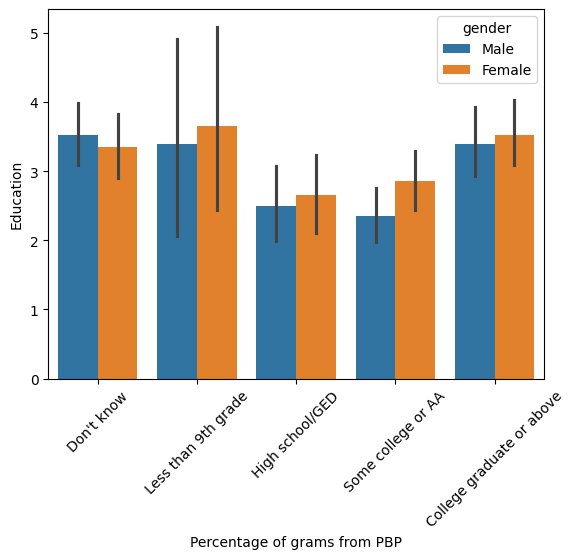

In [29]:
# pbp consumption by gender
ax = sns.barplot(
  data=dat,
  y='pbp_perc',
  x='education',
  hue='gender',
  order=[
    "Don't know",
    'Less than 9th grade', 
    'High school/GED', 
    'Some college or AA', 
    'College graduate or above'
  ],
  weights='dr1_weight',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Percentage of grams from PBP',
  ylabel = 'Education'
)
plt.xticks(rotation=45) 
plt.show()
# Would like to adjust names horizontally to line up better after rotation, hjust arg?

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Other or Multi'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Other Hispanic'),
  Text(3, 0, 'Mexican American'),
  Text(4, 0, 'Black')])

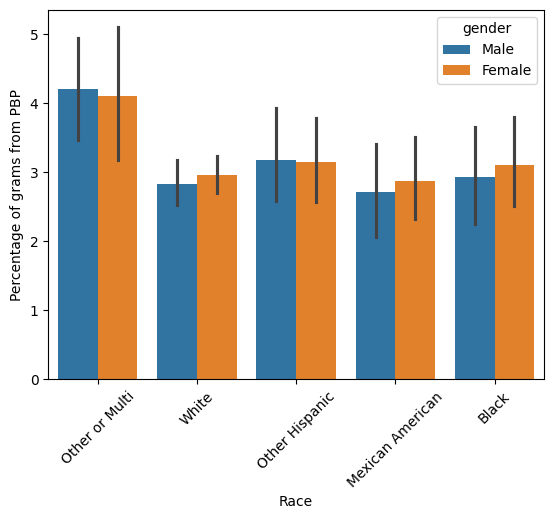

In [30]:
# blp consumption by race
ax = sns.barplot(
  data=dat,
  y='pbp_perc',
  x='race',
  hue='gender',
  weights='dr1_weight',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Race',
  ylabel = 'Percentage of grams from PBP'
)
plt.xticks(rotation=45) 

[Text(0.5, 0, 'Quartiles of Income to Poverty Ratio'),
 Text(0, 0.5, 'Percentage of grams from PBP')]

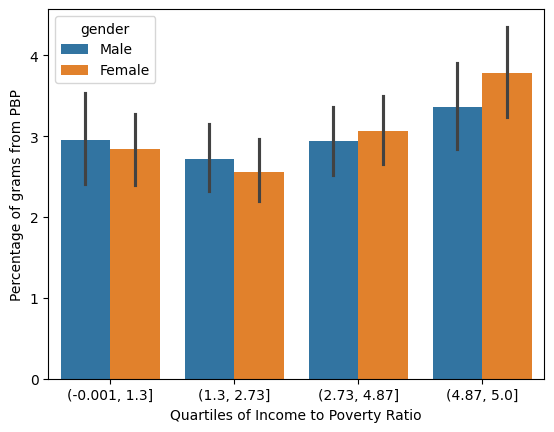

In [31]:
# blp consumption by poverty ratio

ax = sns.barplot(
  data=dat,
  y='pbp_perc',
  x='income_ratio_qs',
  hue='gender',
  weights='dr1_weight',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Quartiles of Income to Poverty Ratio',
  ylabel = 'Percentage of grams from PBP'
)